# SGDRegressor with Normalize & QuantileTransformer

This Code template is for regression analysis using the SGDRegressor where feature normalization using normalize and feature transformation is done using QuantileTransformer.

### Required Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
warnings.filterwarnings('ignore')

### Initialization
Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training.

In [3]:
#x_values
features=[]

Target feature for prediction.

In [4]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

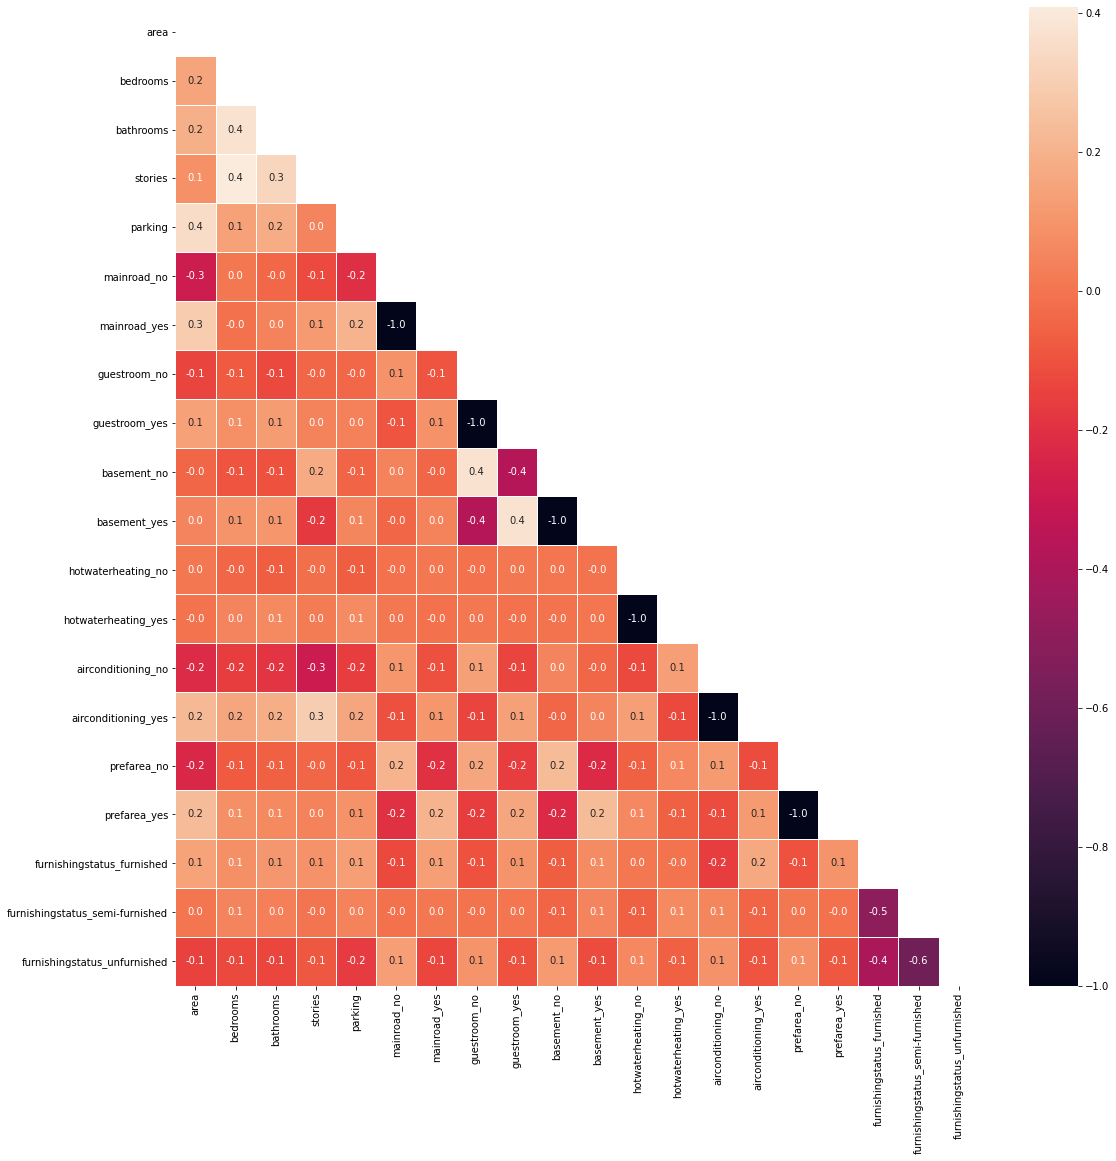

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Rescaling
For rescaling the data **normalize** function of Sklearn is used.

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

The function normalize provides a quick and easy way to scale input vectors individually to unit norm (vector length).

##### For more information on normalize [ click here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

In [10]:
X_norm = normalize(X, axis=0)
X=pd.DataFrame(X_norm,columns=X.columns.tolist())
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.056876,0.056077,0.062047,0.064165,0.077498,0.0,0.046225,0.047246,0.000000,0.053149,0.000000,0.043853,0.0,0.000000,0.076249,0.00000,0.088388,0.084515,0.000000,0.0
1,0.068680,0.056077,0.124094,0.085553,0.116248,0.0,0.046225,0.047246,0.000000,0.053149,0.000000,0.043853,0.0,0.000000,0.076249,0.04897,0.000000,0.084515,0.000000,0.0
2,0.076345,0.042058,0.062047,0.042776,0.077498,0.0,0.046225,0.047246,0.000000,0.000000,0.072357,0.043853,0.0,0.051778,0.000000,0.00000,0.088388,0.000000,0.066372,0.0
3,0.057489,0.056077,0.062047,0.042776,0.116248,0.0,0.046225,0.047246,0.000000,0.000000,0.072357,0.043853,0.0,0.000000,0.076249,0.00000,0.088388,0.084515,0.000000,0.0
4,0.056876,0.056077,0.031024,0.042776,0.077498,0.0,0.046225,0.000000,0.101535,0.000000,0.072357,0.043853,0.0,0.000000,0.076249,0.04897,0.000000,0.084515,0.000000,0.0


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### Model

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. Often, an instance of SGDClassifier or SGDRegressor will have an equivalent estimator in the scikit-learn API, potentially using a different optimization technique.


For example, using SGDRegressor(loss='squared_loss', penalty='l2') and Ridge solve the same optimization problem, via different means.

#### Model Tuning Parameters
> - **loss** -> The loss function to be used. The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
> - **penalty** -> The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.
> - **alpha** -> Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to learning_rate is set to ‘optimal’.
> - **l1_ratio** -> The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is ‘elasticnet’.
> - **tol** -> The stopping criterion
> - **learning_rate** -> The learning rate schedule,possible values {'optimal','constant','invscaling','adaptive'}
> - **eta0** -> The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.
> - **power_t** -> The exponent for inverse scaling learning rate.
> - **epsilon** -> Epsilon in the epsilon-insensitive loss functions; only if loss is ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.

### Quantile Transformer

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Transform features using quantiles information.

Check [QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) for more details.

In [12]:
model=make_pipeline(QuantileTransformer(), SGDRegressor())
model.fit(x_train,y_train)

Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('sgdregressor', SGDRegressor())])

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

score: The score function returns the coefficient of determination R2 of the prediction.



In [13]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 64.10 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [14]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 64.10 %
Mean Absolute Error 994734.77
Mean Squared Error 1814722185473.95


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

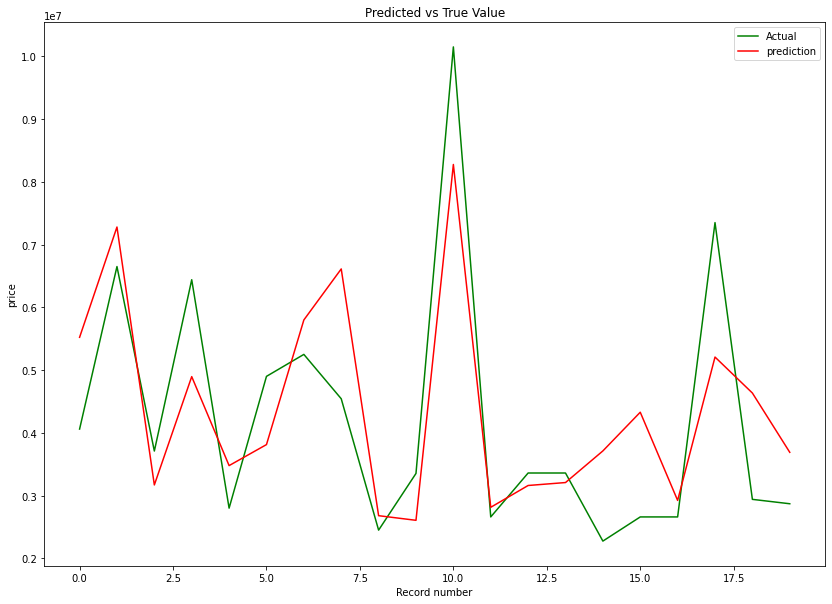

In [15]:
n=len(x_test) if len(x_test)<20 else 20
plt.figure(figsize=(14,10))
plt.plot(range(n),y_test[0:n], color = "green")
plt.plot(range(n),model.predict(x_test[0:n]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Yogesh Kumar Singh , Github: [Profile](https://github.com/mohityogesh44)